# 911 Calls project

For this project i've analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) for period from 2015-2016. The data contains the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

There are some basic and advanced questions for us:
- What are the top 5 townships for 911 calls?
- What are the top 5 zipcodes for 911 calls?
- How many unique title codes are there?
- What is the most common Reason for a 911 call?
- What is the relationship between date (days of week, months, hours) and number of calls

### Let's get started

In [2]:
# import numpy and pandas for working with dataframes
import numpy as np
import pandas as pd
# import plotting libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#for visualisation in jupyter
%matplotlib inline

In [3]:
# read csv file with data and define Dataframe df
df = pd.read_csv("911.csv")

In [5]:
#check the info to be sure that we got necessary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
# check the head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


So, now i've tried to answer for basic questions.
The top 5 zipcodes for 911 calls are:

In [7]:
df["zip"].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The top 5 townships for 911 calls are:

In [8]:
df["twp"].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

There are 110 unique title codes, just check:

In [9]:
df["title"].nunique()

110

For advanced questions, i needed to create new columns in df, where i've splitted some data from older columns. First of all i needed exactly reasons from "*Title*" column. We have seen that main reason is located befor ":", so we just need to split our objects before ":":

In [10]:
#use lambda function for splitting every element
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


So, now we can determine the most common Reason for a 911 calls:

In [11]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

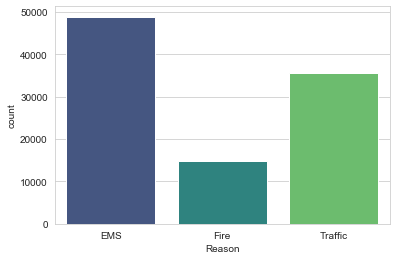

In [14]:
# Plot for presentation
sns.countplot(x = "Reason", data = df, palette = "viridis")

As we see EMS was the most common in the given period



Now let us begin to focus on time information. For solving our problem about relationships between date and number of calls, first we need to work with "*timeStamp*" column. We need to check the datatype of objects in our column:

In [16]:
#in this datafile is just enough to check the first element, because they all have the same type
type(df["timeStamp"].iloc[0])

str

For us it would be better to work with certain datatypes, where we convert type of data to another, than working with string objects:

In [20]:
#use to_datetime method for converting datatype
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
#just check that all we did is correct
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Now we can grab specific attributes from a Datetime object by calling them, like time.hour, time.day, time.year etc. We will create 3 columns, which include hour, month and day of week:

In [22]:
df["Hour"] = df["timeStamp"].apply(lambda x: x.hour)
df["Month"] = df["timeStamp"].apply(lambda x: x.month)

#The Day of Week is an integer 0-6. Use the .map() with dictionary to map the actual string names to the day of the week:
dmap = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
df["Day of Week"] = df["timeStamp"].apply(lambda x: x.dayofweek).map(dmap)

Now we will use seaborn to create a countplot of the "*Day of Week*" column with the hue based off of the Reason column and will do the same with "*Month*":

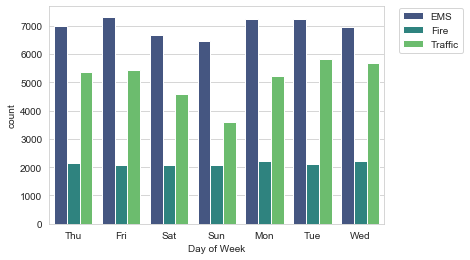

In [24]:
f = sns.countplot(x = "Day of Week", hue = "Reason", data = df, palette = "viridis")
f.legend(loc='center right', bbox_to_anchor=(1.25, 0.89))

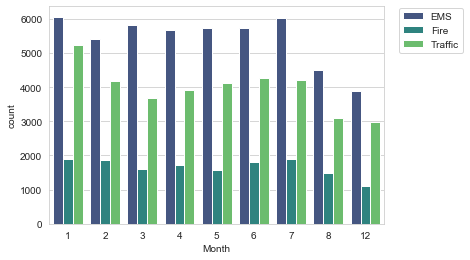

In [25]:
g = sns.countplot(x = "Month", hue = "Reason", data = df, palette = "viridis")
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.89))

We have noticed it was missing some Months (*9, 10 and 11* are not there), let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

Now we will create a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation:

In [26]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Now we'll create a simple plot off of the dataframe indicating the count of calls per month

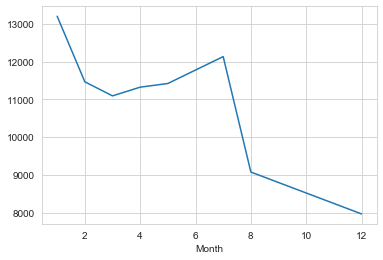

In [27]:
# Could be any column
byMonth['twp'].plot()

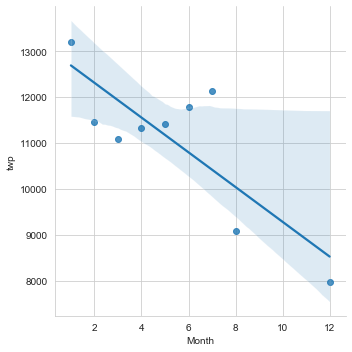

In [30]:
'''
We will use seaborn's lmplot() to create a linear fit on the number of calls per month.
We have to be sure, that indexes are reseted
'''
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

We will create a new column called '*Date*' that contains the date from the *timeStamp* column:

In [31]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Now groupby the new column with the count() aggregate and create a plot of counts of 911 calls:

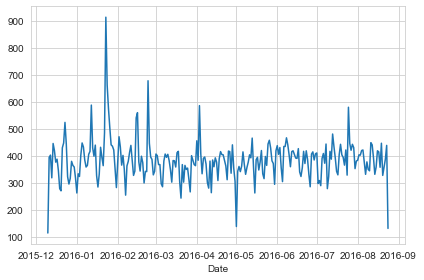

In [32]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Now we will recreate this plot but with 3 separate plots with each plot representing a Reason for the 911 call:

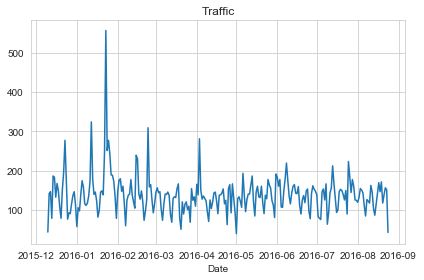

In [33]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

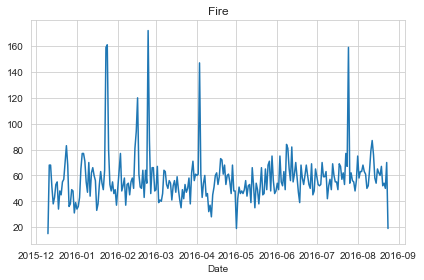

In [34]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

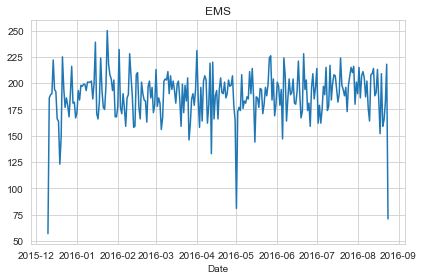

In [35]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week:

In [37]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['twp'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


Now we will create a HeatMap and ClusterMap using this new DataFrame:

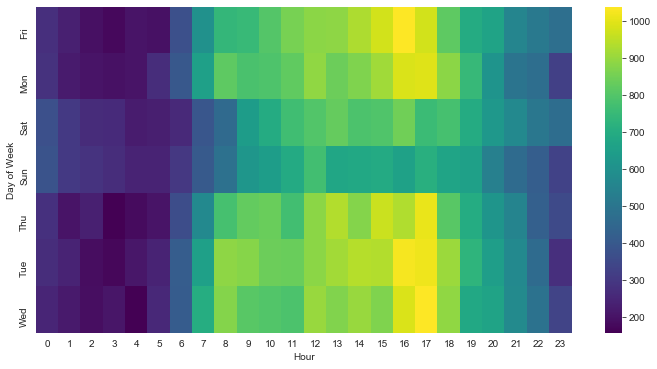

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

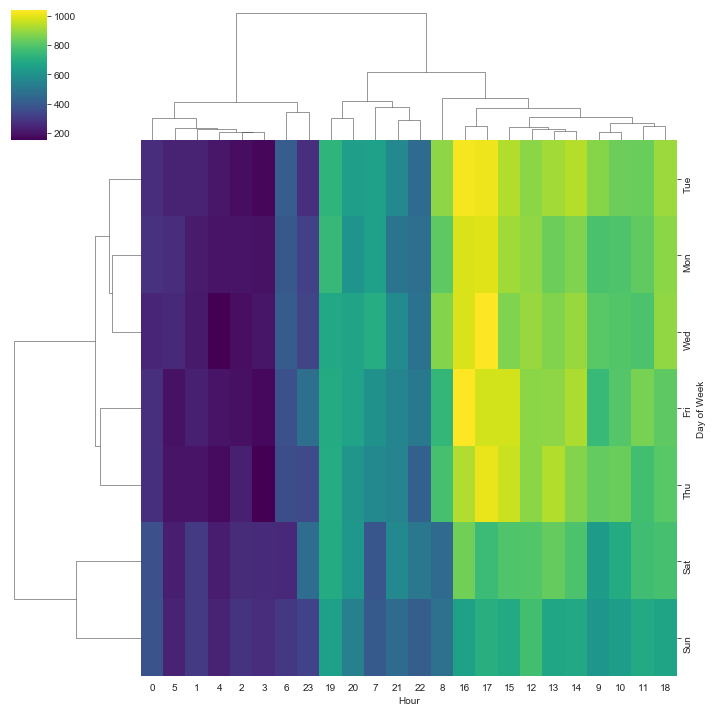

In [39]:
sns.clustermap(dayHour,cmap='viridis')

We notice, that a lot of calls fell in the period on Tue and Fri between 16 and 17 hours.

But now we will repeat these same plots and operations, for a DataFrame that shows the Month as the column:

In [41]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['twp'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265


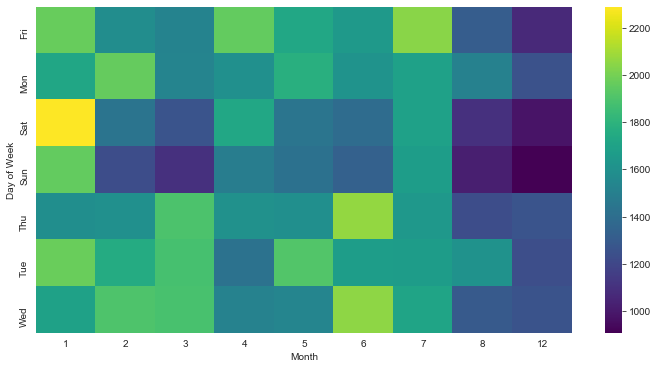

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

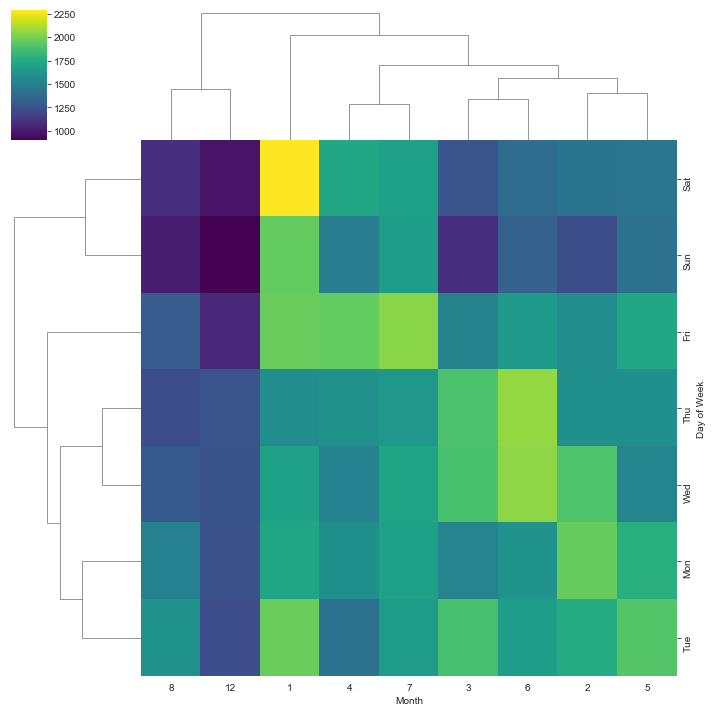

In [43]:
sns.clustermap(dayMonth,cmap='viridis')

As we see a lot of calls fell in the period of Jan on Sat